Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


/home/johan/anaconda2/envs/tensorflow_py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Matrix de confusion No Normalizada
 Matrix de confusion Normalizada 


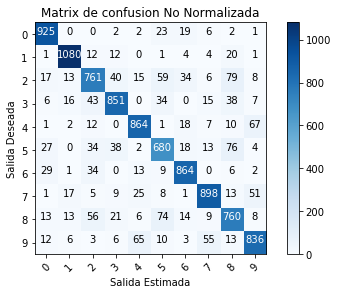

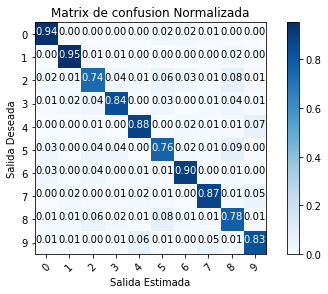

Current Loss=  0.023912378
Accuracy=  0.8519


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix

X = tf.placeholder(tf.float32,(None, None), name='X')
Y = tf.placeholder(tf.float32,(None, None), name='Y')

Wco = tf.Variable(tf.random_uniform((784,10),-1,1))
bco = tf.Variable(tf.random_uniform((10,),-1,1))


Wcs = tf.Variable(tf.random_uniform((10,10),-1,1))
bcs = tf.Variable(tf.random_uniform((10,),-1,1))

OutputCo= tf.tanh(tf.matmul(X,Wco)+bco)
Output=tf.nn.sigmoid((tf.matmul(OutputCo,Wcs)+bcs))

# FunciÃ³n de pÃ©rdida MSE
loss = tf.reduce_mean(tf.square(Y-Output))

# optimizador
#optimizer = tf.train.GradientDescentOptimizer(0.1)
optimizer  = tf.train.AdagradOptimizer(0.1,0.0001)

train = optimizer.minimize(loss)

## training loop
 
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
  # Train
for _ in range(20000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train, feed_dict={X: batch_xs, Y: batch_ys})

# Test trained model
Out_CM=np.zeros([10000,1],dtype=np.float64)  
y_test_CM=np.zeros([10000,1],dtype=np.float64)
Out_test_CM=np.zeros([10000,1],dtype=np.float64)
curr_loss,curr_Output= sess.run([loss,Output], {X:mnist.test.images, Y: mnist.test.labels})

for ii in range(0,10000):
    Out_test_CM[ii] = np.argmax(curr_Output[ii,:])
    y_test_CM[ii] = np.argmax(mnist.test.labels[ii,:])
    
  
class_names=['0', '1', '2','3', '4', '5','6', '7', '8','9']    

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" Matrix de confusion Normalizada ")
    else:
        print('Matrix de confusion No Normalizada')

#    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Salida Deseada')
    plt.xlabel('Salida Estimada')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_CM, Out_test_CM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()

print("Current Loss= ",curr_loss)
 

correct_prediction = tf.equal(tf.argmax(Output, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy= ",sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))